# Section 11: Logistic Regression and Classification

In classification problem, the response variables $y$ are discrete, representing different catagories. 

**Why not use linear regression for classification problem?**
- The problem for range of $y$
- The inappropriate **MSE** loss function, especially for multi-class classification. It does not make sense to assume miss-classify 9 for 1 will yield a larger penalty than 7 for 1.
- There's no order in the $y$ in **classification** -- they are just categories (imagine Iris flower, we can permute the label number as we like, while the permutation will definitely affect **regression** results)

Therefore for classification problem, we may want to:
- replace the mapping assumption between $y$ and $x$
- replace the loss function in regression

In this section, we're going to learn [**logistic regression**](https://en.wikipedia.org/wiki/Logistic_regression), which is a linear **classification** method and a direct generalization of linear regression. We will learn more classification models in the next section.

## Binary Classification

For simplicity, we will first introduce the **binary classification case** -- $y$ has only two categories, denoted as $0$ and $1$.

### Model-setup of Logistic Regression (this is a classification model)

**Assumption 1**: Dependent on the variable $x$, the response variable $y$ has different **probabilities** to take value in 0 or 1. Instead of predicting exact value of 0 or 1, we are actually predicting the **probabilities**.

**Assumption 2**: Logistic function assumption. Given $x$, what is the probability to observe $y=1$?

$$P(y=1|\mathbf{x})= f(\mathbf{x};\mathbf{\beta}) = \frac{1}{1 + \exp(-\tilde{x}\mathbf{\beta})}
=: \sigma(\tilde{x}\mathbf{\beta}). $$

where $\sigma(z)=\frac{1}{1+\exp{(-z)}}$ is called [standard logistic function](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression), or sigmoid function in deep learning. Recall that $\beta\in\mathbb{R}^{p+1}$ and $\tilde{x}$ is the "augmented" sample with first element one to incorporate intercept in the linear function.

**Equivalent expression**:
  - Denote $p = P(y=1|\mathbf{x})$, then we can write in linear form (the LHS is called **odds ratio** in statistics)
  $$\ln\frac{p}{1-p}=\tilde{x}\beta$$
  - Since $y$ only takes value in 0 or 1, we choose our exponents to be **indicators** of y. We have
  $$P(y|\mathbf{x},\beta) = f(\mathbf{x};\beta)^y \big(1 - f(\mathbf{x};\beta) \big)^{1-y}$$
  - Note: for conditional probability, $|$ and $;$ are interchangable and mean the same thing.
  
**MLE (Maximum Likelihood Estimation)**

Assume the samples are independent. The overall probability to witness the whole training dataset
$$
{\begin{aligned}
&P(\mathbf{y}\; | \; \mathbf{X};\beta )\\
=&\prod _{i=1}^N P\left(y^{(i)}\mid \mathbf{x}^{(i)};\beta\right)\\
=&\prod_{i=1}^N f\big(\mathbf{x}^{(i)};\beta \big)^{y^{(i)}} 
\Big(1-f\big(\mathbf{x}^{(i)};\beta\big) \Big)^{\big(1-y^{(i)}\big)}.
\end{aligned}}
$$

By maximizing the logarithm of likelihood function, then we derive the **loss function** to be minimized
$$
L (\beta) = L (\beta; X,\mathbf{y}) = - \frac{1}{N}\sum_{i=1}^N 
\Bigl\{y^{(i)} \ln\big( f(\mathbf{x}^{(i)};\beta) \big) 
+ (1 - y^{(i)}) \ln\big( 1 - f(\mathbf{x}^{(i)};\beta) \big) \Bigr\}.
$$

The loss function also has clear probabilistic interpretations. Given $i$-th sample, the vector of true labels $(y^{(i)},1-y^{(i)})$ can also be viewed as the probability distribution. Then the loss function is the mean of all [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy) across samples, i.e. **"distance" between observed sample probability distribution and modelled probability distribution** via logistic model.

**Remark**: here we derive the loss function via MLE. Of course from the experience of linear regression, we know that we can also use MAP (bayesian approach), where the regularization term of $\beta$ can be naturally introduced.

### Algorithm

Take the gradient (left as exercise -- if you like)
$$
\frac{\partial L (\beta)}{\partial \beta_{k}} =\frac{1}{N}\sum_{i=1}^N  \big(\sigma(\tilde{x}^{(i)}\beta)  - y^{(i)} \big) \tilde{x}^{(i)}_k.
$$

In vector form:
$$
\nabla_{\beta} \big( L (\beta) \big) = \frac{1}{N} \sum_{i=1}^N \big(\sigma(\tilde{x}^{(i)}\beta)  - y^{(i)} \big) \tilde{x}^{(i)} 
=\frac{1}{N}\sum_{i=1}^N \big( f(\mathbf{x}^{(i)};\beta)  - y^{(i)} \big) \tilde{x}^{(i)}$$ 

The last expression in the above line can be further represented as a row vector times a matrix:
$$\nabla_{\beta} \big( L (\beta) \big) = \frac{1}{N}\big( f(\mathbf{x}^{(1)};\beta)  - y^{(1)}, \hspace{1pc} f(\mathbf{x}^{(2)};\beta)  - y^{(2)}, \hspace{1pc} \cdots \hspace{1pc} f(\mathbf{x}^{(N)};\beta)  - y^{(N)} \big)\tilde{X}.
$$

However, this is a nonlinear function of $\beta$, indicating that we cannot derive something like "normal equations" in OLS. The solution here is [numerical optimization](https://github.com/Jaewan-Yun/optimizer-visualization).

The simplest algorithm in optimization is [gradient descent (GD)](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,function%20at%20the%20current%20point.) We create a sequence of vectors $\{\beta^0, \beta^1, \beta^2, ... \}$ using the following recursive rule: $$\beta^{k+1}=\beta^{k}-\eta\nabla L(\beta^{k}).$$

Here the step size $\eta$ (eta) is also called **learning rate** in machine learning. Note that it is indeed the Euler's scheme to solve the ODE (for a 1-variable version, see [Notes on Diffy Q's Section 1.7](https://www.jirka.org/diffyqs/html/numer_section.html)): $$\dot{\beta} = -\nabla L(\beta).$$

By setting certain stopping criterion for GD, we think that we have approximated the optimized solution $\hat{\beta}$.

## Making predictions and Evaluation of Performance

Now with the estimated $\hat{\beta}$ and given a new data $x^{new}$, we calculate the probability that $y^{new}=1$ as $f(\mathbf{x};\mathbf{\beta})$. If is greater than 0.5, we assign that $y^{new}=1$. 

For the test dataset, the **accuracy** is defined as ratio of number of correct predictions to the total number of samples.

## Example Code

In [1]:
import numpy as np

class myLogisticRegression_binary():
    """ Logistic Regression classifier -- this only works for the binary case.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    def __init__(self, learning_rate=.1):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        

    def fit(self, data, y, n_iterations = 1000):
        """ 
        don't forget the document string in methods
        """
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        eta = self.learning_rate
        
        beta  = np.zeros(np.shape(X)[1]) # initialize beta, same as initial condition beta_0 = [0,0,0,0,0,0,0,...0] , can be other choices

        for k in range(n_iterations):
            dbeta = self.loss_gradient(beta,X,y) # write another function to compute gradient
            beta = beta - eta * dbeta # the formula of GD
            # this step is optional -- just for inspection purposes
            if k % 500 == 0: # print loss every 500 steps
                print("loss after", k+1, "iterations is: ", self.loss(beta,X,y))
        
        self.coeff = beta
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        beta = self.coeff # the estimated beta
        y_pred = np.round(self.sigmoid(np.dot(X,beta))).astype(int) # >0.5: ->1 else,->0 -- note that we always use Numpy universal functions when possible
        return y_pred
    
    def score(self, data, y_true):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def loss(self,beta,X,y):
        f_value = self.sigmoid(np.matmul(X,beta))
        loss_value = np.log(f_value + 1e-10) * y + (1.0 - y)* np.log(1 - f_value + 1e-10) #log base 10. Using 1e-10 avoids nan issues
        return -np.mean(loss_value)
                          
    def loss_gradient(self,beta,X,y):
        f_value = self.sigmoid(np.matmul(X,beta))                  
        gradient_value = (f_value - y).reshape(-1,1)*X # this is the hardest expression -- check yourself. It's called Numpy broadcasting
        return np.mean(gradient_value, axis=0)

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y = True)

In [5]:
X_fr, y_fr = load_breast_cancer(return_X_y = True, as_frame = True) #Optional, not used in the training or testing phases. Just to look at dataset 

In [9]:
X_fr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y_fr

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
X_train.shape

(512, 30)

In [10]:
%%time
lg = myLogisticRegression_binary(learning_rate=1e-5)
lg.fit(X_train,y_train,n_iterations = 10000) # what about increase n_iterations?

loss after 1 iterations is:  0.7704000919325609
loss after 501 iterations is:  0.3038878556607375
loss after 1001 iterations is:  0.2646726705164665
loss after 1501 iterations is:  0.2481347924595069
loss after 2001 iterations is:  0.23894805957882753
loss after 2501 iterations is:  0.23311785521728878
loss after 3001 iterations is:  0.22909746536348713
loss after 3501 iterations is:  0.2261514996674705
loss after 4001 iterations is:  0.22388601401780295
loss after 4501 iterations is:  0.2220728516137011
loss after 5001 iterations is:  0.2205722111378522
loss after 5501 iterations is:  0.21929462157026378
loss after 6001 iterations is:  0.21818078310948252
loss after 6501 iterations is:  0.21719023774728446
loss after 7001 iterations is:  0.21629469731306186
loss after 7501 iterations is:  0.21547395937965438
loss after 8001 iterations is:  0.21471332436186455
loss after 8501 iterations is:  0.21400191582326006
loss after 9001 iterations is:  0.21333156155309693
loss after 9501 iterati

In [11]:
lg.score(X_test,y_test)

1.0

In [12]:
lg.score(X_train,y_train)

0.9140625

In [13]:
lg.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [14]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [15]:
lg.coeff

array([ 1.92156972e-03,  1.35014099e-02,  5.60837090e-03,  6.98616548e-02,
        1.63274570e-02,  8.11846822e-05, -3.05842439e-04, -5.82893624e-04,
       -2.34074392e-04,  1.52008899e-04,  8.23455085e-05,  1.19749200e-04,
        7.36438347e-04, -9.69461818e-04, -2.25609056e-02,  1.60975351e-06,
       -8.32345494e-05, -1.14621433e-04, -2.63019486e-05,  7.14323607e-06,
       -3.90033063e-06,  1.41429198e-02,  1.95665028e-03,  6.13141823e-02,
       -2.82368244e-02,  6.40567132e-05, -1.16724642e-03, -1.62789172e-03,
       -4.19315981e-04,  6.01178429e-05,  3.79852714e-06])

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\lukea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9824561403508771

In [17]:
clf.score(X_train,y_train)

0.958984375

It's very normal that our result is different with sklearn. In sklearn [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), by default the loss function is different (they use regularization terms!).

---

## Multi-class Classification

Note that your final project is a multi-class classification problem

### Model 
Let $\tilde{x}\in\mathbb{R}^{p+1}$ denotes the augmented row vector (one sample). We approximate the probabilities to take value in $K$ classes as

$$
f(\mathbf{x};\mathbf{W}) =
\begin{pmatrix}
P(y = 1 | \mathbf{x}; \mathbf{W}) \\
P(y = 2 | \mathbf{x}; \mathbf{W}) \\
\vdots \\
P(y = K | \mathbf{x}; \mathbf{W})
\end{pmatrix}
=
\frac{1}{ \sum_{k=1}^{K}{\exp\big(\tilde{x}\mathbf{w}_{k}\big) }}
\begin{pmatrix}
\exp(\tilde{x}\mathbf{w}_{1} ) \\
\exp(\tilde{x}\mathbf{w}_{2} ) \\
\vdots \\
\exp(\tilde{x}\mathbf{w}_{K} ) \\
\end{pmatrix}.
$$
where we have $K$ sets of parameters, $\mathbf{w}_1, \mathbf{w}_2, \dots, \mathbf{w}_K$, and the sum factor normalizes the results to be a probability.

$\mathbf{W}$ is an $(p+1)\times K$ matrix containing all $K$ sets of parameters, obtained by concatenating $\mathbf{w}_1, \mathbf{w}_2, \dots, \mathbf{w}_K$ into columns, so that $\mathbf{w}_k = (w_{k0}, \dots, w_{kp})^{\top}\in \mathbb{R}^{p+1}$.

$$
\mathbf{W} = \left(
\begin{array}{cccc}| & | & | & | \\
\mathbf{w}_1 & \mathbf{w}_2 & \cdots & \mathbf{w}_K \\
| & | & | & |
\end{array}\right),
$$
and $\tilde{X}\mathbf{W}$ is valid and useful in vectorized code.

**Another Expression**: Introduce the hidden variable $\mathbf{z} = (z_{1},...,z_{K})$ and define 

$$ \mathbf{z}= \tilde{\mathbf{x}} \mathbf{W}$$
or element-wise written as 
$$z_{k} = \tilde{\mathbf{x}} \mathbf{w_{k}}, \, k = 1,2,...,K$$

Then the **predicted probability distribution** can be denoted as 

$$f(\mathbf{x};\mathbf{W}) = \sigma(z)\in\mathbb{R}^{K}$$
where vector $\sigma(\mathbf{z})$ is called the [soft-max function](https://en.wikipedia.org/wiki/Softmax_function) which is defined as 

$$ \sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}{\text{ for }}i=1,\dotsc ,K{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}$$

This is a valid probability distribution with $K$ classes because you can check its element-wise sum is one and each component is positive.

This can be assumed as the (degenerate) simplest example of neural network that we're going to learn in later lectures, and that's why some people refer to multi-class logistic regression (also known as **soft-max logistic regression**) as **one-layer neural network**.

----

### Loss function

Define the following **indicator function** (and again can be derived from MLE):
$$
1_{\{y = k\}} = 1_{\{k\}}(y) = \delta_{yk} = \begin{cases}
1 & \text{when } y = k,
\\[5pt]
0 & \text{otherwise}.
\end{cases}
$$

Other notations for indicators: $\mathbb{1}_{\{k\}}(y)$, $\mathbb{I}_{\{k\}}(y)$, ${I}_{\{k\}}(y)$

Loss function is again using the cross entropy:

$$
\begin{aligned}
L (\mathbf{W};X,\mathbf{y})  & = - \frac{1}{N}\sum_{i=1}^N \sum_{k=1}^K
\Bigl\{ 1_{\{y^{(i)} = k\}} \ln P\big(y^{(i)}=k | \mathbf{x}^{(i)} ; \mathbf{w} \big) \Bigr\}
\\
 & = - \frac{1}{N}\sum_{i=1}^N \sum_{k=1}^K
\left\{1_{\{y^{(i)} = k\}} \ln \Bigg( \frac{\exp(\tilde{x}^{(i)}\mathbf{w}_{k})}{\sum_{m=1}^{K} 
\exp\big(\tilde{x}^{(i)}\mathbf{w}_m\big) }  \Bigg)\right\}.
\end{aligned}
$$

Notice that for each term in the summation over N (i.e. fix sample i), only one term is non-zero in the sum of K elements due to the indicator function.


### Gradient descent
After **careful calculation**, the gradient of $L$ with respect the whole $k$-th set of weights is then (in the notation of [Matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus#Scope)):

$$
\frac{\partial L }{\partial \mathbf{w}_{k}}
= \left( \frac{\partial L }{\partial {w}_{k0}}, \, \frac{\partial L }{\partial {w}_{k1}}, \, \cdots \frac{\partial L }{\partial {w}_{kP}} \right)^T
= 
\frac{1}{N}\sum_{i=1}^N 
\left(    \frac{\exp(\tilde{x}^{(i)}\mathbf{w}_{k})} {\sum_{m=1}^{K} 
\exp(\tilde{x}^{(i)}\mathbf{w}_m)} -1_{\{y^{(i)} = k\}} 
\right)\tilde{x}^{(i)}\in\mathbb{R}^{p+1}.
$$

In writing the code, it's helpful to make this as the column vector, and stack all the $K$ gradients together as a new matrix $\mathbf{dW}\in\mathbb{R}^{(p+1)\times K}$. This makes the update of matrix $\mathbf{W}$ very convenient in gradient descent.

$$
\frac{\partial L}{\partial \textbf{W}} = dW = \left(
\begin{array}{cccc}| & | & | & | \\
\frac{\partial L }{\partial \mathbf{w}_{1}} & \frac{\partial L }{\partial \mathbf{w}_{2}} & \cdots & \frac{\partial L }{\partial \mathbf{w}_{K}} \\
| & | & | & |
\end{array}\right),
$$


### Prediction
The largest estimated probability's class as this sample's predicted label.
$$
\hat{y} = \operatorname{arg}\max_{j} P\big(y = j| \mathbf{x}\big),
$$
In other words, we get the class $j$ with the largest conditional probability, a.k.a. likelihood.

In [20]:
import numpy as np

class myLogisticRegression():
    """ Logistic Regression classifier -- this also works for the multiclass case.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    def __init__(self, learning_rate=.1):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        

    def fit(self, data, y, n_iterations = 1000):
        """ 
        don't forget the document string in methods, here and all others!!!
        """
        self.K = max(y)+1 # specify number of classes in y
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) # initialize beta, can be other choices

        for k in range(n_iterations):
            dW = self.loss_gradient(W,X,y) # write another function to compute gradient
            W = W - eta * dW # the formula of GD
            # this step is optional -- just for inspection purposes
            if k % 500 == 0: # print loss every 500 steps
                print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        self.coeff = W
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W): #return the softmax probability
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) # avoid nan issues
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [21]:
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
import pandas as pd
df = pd.DataFrame(X)
df #rows are samples of drawings, columns give pixels of the 8x8

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [23]:
X_train.shape

(1617, 64)

In [24]:
lg = myLogisticRegression(learning_rate=1e-4)
lg.fit(X_train,y_train,n_iterations = 20000) # what about change the parameters?

loss after 1 iterations is:  2.2975031101988965
loss after 501 iterations is:  0.9747646840265886
loss after 1001 iterations is:  0.6271544957404386
loss after 1501 iterations is:  0.48465074291917476
loss after 2001 iterations is:  0.4067886795416971
loss after 2501 iterations is:  0.3569853787369549
loss after 3001 iterations is:  0.3219498860091718
loss after 3501 iterations is:  0.2957112499207807
loss after 4001 iterations is:  0.27517638606506345
loss after 4501 iterations is:  0.2585728459578632
loss after 5001 iterations is:  0.24480630370680928
loss after 5501 iterations is:  0.23316150090969132
loss after 6001 iterations is:  0.22314954388974834
loss after 6501 iterations is:  0.21442400929215735
loss after 7001 iterations is:  0.2067320488693829
loss after 7501 iterations is:  0.19988447822601135
loss after 8001 iterations is:  0.19373672640885967
loss after 8501 iterations is:  0.18817628341982656
loss after 9001 iterations is:  0.1831141858457873
loss after 9501 iterations

In [ ]:
lg.coeff

In [26]:
lg.coeff.shape #65 coefficients, 1 per row of data plus the constant term. 10 functions, 1 per class -- digits we are classifying.

(65, 10)

In [27]:
lg.score(X_test,y_test)

0.9722222222222222

In [28]:
np.where(lg.predict(X_test)!=y_test)

(array([  5,  71, 133, 149, 159], dtype=int64),)

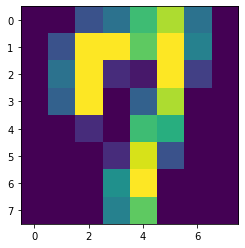

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_test[133,].reshape(8,8))

In [34]:
print(lg.predict(X_test)[133],y_test[133])

9 7


For multi-class classification, the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) can provide as more details.

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lg.predict(X_test))

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 24]], dtype=int64)

**First row**: seventeen 0s were classified as 0

**Second row**: ten 1s were classified as 1, one 1 was classified as 2

**Exercise**: Determine what the rest of the rows tell us!

## Tricks in training: Stochastic Gradient Descent (SGD)

When you're doing the final project, it's very likely that you might lose patience -- training on the 60,000 MNIST data is VERY SLOW! (of course it's not an excuse to abandon the project lol)

To speed up the training process (most importantly the optimization algorithm), there are two directions of general strategies:
    - find better algorithm whose convergence is faster (you take less steps to arrive at the minimum)
    - save the computational cost within each step
    
Of course there are trade-offs between these two directions.

    
**Basic observation of SGD**: Calculating the gradient in each step is TOO EXPENSIVE! 

Recall that in general supervised learning, $$\nabla_{\beta} L(\beta;X,Y) = \frac{1}{N}\sum_{i=1}^{N}\nabla_{\beta}l(\beta;x^{(i)},y^{(i)})$$

It means that we need to implement 60,000 sum calculation in the single step!!!

**"Wild" yet smart idea**: Note that the RHS is in the form of "population average". The basic intuitive from statistics is that we can use "sample means" to replace "population average". If you're bold enough -- just randomly pick up ONE single sample and use this value to replace "population average"!

- Herustic expression of "pure stochastic" SGD: $$\beta^{k+1}=\beta^{k}-\eta \nabla_{\beta}l(\beta^{k};x^{(r)},y^{(r)}),$$ where $r$ denotes the index randomly picked during this step.

    
- (mini-batch SGD, or "standard" SGD):$$\beta^{k+1}=\beta^{k}-\eta \frac{1}{n_{B}}\sum_{k=1}^{n_{B}}\nabla_{\beta}l(\beta^{k};x^{(k)},y^{(k)}),$$ where $n_b$ denotes the size of mini-batch, and the average is taken over the $n_b$ random samples.
    

In actual programming, we don't want to generate new random numbers in each step, nor want to "waste" some samples -- we desire all training data can be used during SGD. It is very useful to adopt the "epoch-batch" strategy (or called cyclic rule) through permutation of the data.

> Choose initial guess $\beta^{0}$, step size (learning rate) $\eta$, <br>
batch size $n_B$, number of inner iterations $M\leq N/n_B$, number of epochs $n_E$ <br><br>
>    For epoch $n=1,2, \cdots, n_E$<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; $\beta^{0}$ for the current epoch is $\beta^{M+1}$ for the previous epoch.<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; Randomly shuffle the training samples.<br>
>    &nbsp;&nbsp;&nbsp;&nbsp; For $m=0,1,2, \cdots, M-1$ <br>
>    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    $\displaystyle\beta^{m+1} = {\beta}^m -  \frac{\eta}{n_B}\sum_{i=1}^{n_B} \nabla_{\beta} l(\beta^{m}; 
x^{(m*n_{B}+i)},y^{(m*n_{B}+i)})$

If the gradient loss of your program is written in a highly vectorized way (it supports a data matrix as the input), then you can simply make the data matrix within the mini-batch as the input in each GD update. Below is the example based on our previous binary logistic regression codes. 

In practice, you may also find it helpful to adjust the stepsize (learning rate $\eta$) during the iteration.

In [56]:
import numpy as np

class myLogisticRegression_binary():
    """ Logistic Regression classifier -- this only works for the binary case. Here we provide the option of SGD in optimization.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    def __init__(self, learning_rate=.001, opt_method = 'SGD', num_epochs = 50, size_batch = 20):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        self.opt_method = opt_method
        self.num_epochs = num_epochs
        self.size_batch = size_batch
        
        
    def fit(self, data, y, n_iterations = 1000):
        """ 
        don't forget the document string in methods
        """
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        eta = self.learning_rate
        
        beta  = np.zeros(np.shape(X)[1]) # initialize beta, can be other choices

        if self.opt_method == 'GD':
            for k in range(n_iterations):
                dbeta = self.loss_gradient(beta,X,y) # write another function to compute gradient
                beta = beta - eta * dbeta # the formula of GD
                # this step is optional -- just for inspection purposes
                if k % 500 == 0: # pprint loss every 500 steps
                    print("loss after", k+1, "iterations is: ", self.loss(beta,X,y))
        
        if self.opt_method == 'SGD':
            N = X.shape[0]
            num_epochs = self.num_epochs
            size_batch = self.size_batch
            num_iter = 0
            for e in range(num_epochs):
                shuffle_index = np.random.permutation(N) # in each epoch, we first reshuffle the data to create "randomness"
                for m in range(0,N,size_batch):   # m is the starting index of mini-batch
                    i = shuffle_index[m:m+size_batch] # index of samples in the mini-batch
                    dbeta = self.loss_gradient(beta,X[i,:],y[i]) # only use the data in mini-batch to compute gradient. Note the average is taken in the loss_gradient function
                    beta = beta - eta * dbeta # the formula of GD, but this time dbeta is different
                
                    if e % 1 == 0 and num_iter % 500 ==0: # print loss during the training process
                        print("loss after", e+1, "epochs and ", num_iter+1, "iterations is: ", self.loss(beta,X,y))
        
                    num_iter = num_iter +1  # number of total iterations
            
        self.coeff = beta
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        beta = self.coeff # the estimated beta
        y_pred = np.round(self.sigmoid(np.dot(X,beta))).astype(int) # >0.5: ->1 else,->0 -- note that we always use Numpy universal functions when possible
        return y_pred
    
    def score(self, data, y_true):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def loss(self,beta,X,y):
        f_value = self.sigmoid(np.matmul(X,beta))
        loss_value = np.log(f_value + 1e-10) * y + (1.0 - y)* np.log(1 - f_value + 1e-10) # avoid nan issues
        return -np.mean(loss_value)
                          
    def loss_gradient(self,beta,X,y):
        f_value = self.sigmoid(np.matmul(X,beta))                  
        gradient_value = (f_value - y).reshape(-1,1)*X # this is the hardest expression -- check yourself
        return np.mean(gradient_value, axis=0)

You will find adapting the SGD codes above to multi-class logistic regression is very helpful in doing your final project! (although it's not basic requirement). Here is the very intuitive argument when SGD can boost the algorithms.

Suppose in the training dataset you have $N= 60,000$ samples. With GD, each iteration will cost 60,000 summations. Now consider using SGD. We have the mini-batch size of 30. Then each iteration will cost only 30 sums. For a complete epoch, you have 60,000 sums -- the same with GD, but you have already iterated for 2000 steps!

Of course you may argue that the "quality" of steps in GD is "far better" than SGD. Surely there is the trade-off, but pratically [the inferior performace of SGD in convergence does not obscure its super efficiency over GD](https://www.stat.cmu.edu/~ryantibs/convexopt/lectures/stochastic-gd.pdf). In fact, SGD is the de facto optimization method in deep learning. (SGD and BP -- backward propogation to calculate the gradient are the two fundamental cornerstones in deep learning.)

Next, we compare GD and SGD with the UCI ["adult" dataset](https://archive.ics.uci.edu/ml/datasets/adult) to predict income. Note that it is a binary classification problem.

In [36]:
import pandas as pd
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [37]:
from numpy import nan
df = df.replace('?',nan) #dealing with missing values -- ? in original dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [38]:
df.dropna(inplace = True) # drop missing values
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
df.drop(columns=['fnlwgt','native-country'], inplace=True) # drop some variables we are not interested
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [40]:
from sklearn.preprocessing import LabelEncoder
df_clean = df.apply(LabelEncoder().fit_transform) # transform the categorical variables into numerical
df_clean

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,8,2,1,6,4,6,3,2,1,0,0,39,0
1,21,2,11,8,2,4,0,4,1,0,0,49,0
2,11,1,7,11,2,10,0,4,1,0,0,39,1
3,27,2,15,9,2,6,0,2,1,96,0,39,1
5,17,2,0,5,4,7,1,4,1,0,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,2,7,11,2,12,5,4,0,0,0,37,0
48838,23,2,11,8,2,6,0,4,1,0,0,39,1
48839,41,2,11,8,6,0,4,4,0,0,0,39,0
48840,5,2,11,8,4,0,3,4,1,0,0,19,0


Note that it is not best way to encode the data. Please see other solutions in [kaggle](https://www.kaggle.com/wenruliu/adult-income-dataset/notebooks).

In [41]:
y = df_clean['income'].to_numpy()
X = df_clean.drop(columns = 'income').to_numpy()

In [42]:
X.shape

(45222, 12)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\lukea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8273269953570639

In [57]:
lg_gd = myLogisticRegression_binary(learning_rate=1e-6, opt_method = 'GD')
lg_sgd = myLogisticRegression_binary(learning_rate=1e-6, opt_method = 'SGD', num_epochs = 15, size_batch = 40)

In [48]:
%%time
lg_gd.fit(X_train,y_train,n_iterations = 15000)

loss after 1 iterations is:  0.6930358550277247
loss after 501 iterations is:  0.6503339171382144
loss after 1001 iterations is:  0.6250322404153786
loss after 1501 iterations is:  0.6091127195017652
loss after 2001 iterations is:  0.5984037857262677
loss after 2501 iterations is:  0.590712724359857
loss after 3001 iterations is:  0.5848586907302408
loss after 3501 iterations is:  0.5801861202580018
loss after 4001 iterations is:  0.5763181444418489
loss after 4501 iterations is:  0.5730292982409765
loss after 5001 iterations is:  0.570178434214311
loss after 5501 iterations is:  0.567672659406349
loss after 6001 iterations is:  0.565447582899603
loss after 6501 iterations is:  0.5634562915787977
loss after 7001 iterations is:  0.5616630677823014
loss after 7501 iterations is:  0.5600397185713463
loss after 8001 iterations is:  0.5585633633136624
loss after 8501 iterations is:  0.5572150485499265
loss after 9001 iterations is:  0.555978841583727
loss after 9501 iterations is:  0.554841

In [49]:
lg_gd.score(X_test,y_test)

0.7950475348220207

In [58]:
%%time
lg_sgd.fit(X_train,y_train)

loss after 1 epochs and  1 iterations is:  0.6930377397465836
loss after 1 epochs and  501 iterations is:  0.6500590971685041
loss after 1 epochs and  1001 iterations is:  0.6249660635953507
loss after 2 epochs and  1501 iterations is:  0.6091068807664944
loss after 2 epochs and  2001 iterations is:  0.5984046743702526
loss after 3 epochs and  2501 iterations is:  0.590848944811094
loss after 3 epochs and  3001 iterations is:  0.5848485300498646
loss after 4 epochs and  3501 iterations is:  0.5802138309488267
loss after 4 epochs and  4001 iterations is:  0.5762701835277015
loss after 5 epochs and  4501 iterations is:  0.5729892188339624
loss after 5 epochs and  5001 iterations is:  0.5702264180799361
loss after 6 epochs and  5501 iterations is:  0.5676835881914284
loss after 6 epochs and  6001 iterations is:  0.5654714176508571
loss after 7 epochs and  6501 iterations is:  0.5635054838849006
loss after 7 epochs and  7001 iterations is:  0.5616737682333379
loss after 8 epochs and  7501 

In [59]:
lg_sgd.score(X_test,y_test)

0.7950475348220207

## Reference Reading Suggestions 

- ISLR: Chapter 4
- ESL: Chapter 4
- PML: Chapter 10